# Exploração de Dados de preços de Diamantes 



##### Summary

- *price:*  Preço em dólares americanos
- *carat:*  Peso do diamante
- *cut:*  Qualidade do corte (razoável, bom, muito bom, premium, ideal)
- *color* Cor do diamante, de J (pior) a D (melhor)
- *clarity:* Uma medida de quão claro é o diamante (I1 (pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (melhor))
- *x:* Comprimento em mm
- *y:* Largura em mm
- *z:* Profundidade em mm
- *depth:* Porcentagem de profundidade total = z / média (x, y) = 2 * z / (x + y)
- *table:* Largura do topo do diamante em relação ao ponto mais largo


#### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
%matplotlib inline

#### Importando e Preparando dados

In [2]:
DATA_DIR = '../data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
diamonds.shape

(53940, 10)

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [5]:
diamonds['price']= diamonds['price'].astype(int) 

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.539635
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.703869
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- O valor máximo da **carat** coluna é 5.0 parece um pouco alto considerando o percentil 75, que é próximo de 1,0, e o desvio padrão (0,47), o valor máximo é superior a oito desvios padrão do percentil 75, o que é definitivamente uma grande diferença ou seja, um Outlier.
- O diamante mais barato que observamos é aquele com um preço de 326 dólares, o preço médio é de quase 4.000 dólares, e o diamante mais caro tem um preço de 18.823 dólares; esse preço poderia ser um valor atípico?


#### Verificando valores de **X** que são iguais a zero:

In [7]:
diamonds.loc[diamonds['x']== 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


- Alguns dos diamantes com valor zero em x também possuem zeros nas outras dimensões. Embora o valor real seja zero, faz mais sentido considerá-los como valores faltantes

In [8]:
diamonds=diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182]

carat       1.07
cut        Ideal
color          F
clarity      SI2
depth       61.6
table       56.0
price       4954
x            0.0
y           6.62
z            0.0
Name: 11182, dtype: object

In [9]:
diamonds.loc[11182,'x']=diamonds['x'].median()

In [10]:
diamonds.loc[diamonds['x']==0].shape

(0, 10)

In [11]:
diamonds.loc[diamonds['y']==0]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [12]:
diamonds.loc[11182, 'z'] = diamonds['z'].median()

In [13]:
diamonds.loc[(diamonds['y'] > 30) | (diamonds['z'] > 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [14]:
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]

In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000,53930.000000
mean,0.797873,61.749384,57.457107,3932.072353,5.731985,5.733812,3.539523
std,0.473965,1.432488,2.234057,3988.634982,1.119639,1.111498,0.691687
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.250000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


In [16]:
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

## EDA Univariada

In [17]:
#Criando listas com os nomes dos recursos
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [18]:
#Criando uma função para calcular as estatisticas descritivas de todas as caracteristicas numericas
def desc_num_features(feature_name, bins=30,edgecolor='k',**kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name,size=15)
    plt.figtext(1,0.15, str(diamonds[feature_name].describe().round(2).astype(str)),size=17)

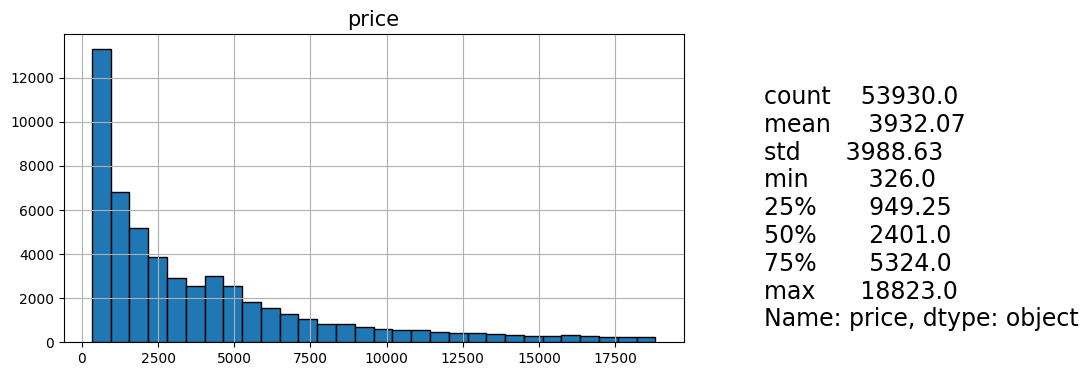

In [19]:
desc_num_features('price')

- O histograma criado possui 30 compartimentos, entao o tamanho de cada compartimento é aproximadamente:

$$
\Large
bin\_size \approx \frac{18823 - 326}{30} \approx 615
$$


- À medida que os preços aumentam, observamos menos diamantes na nossa amostra.
- Existe uma grande variabilidade nos preços dos diamantes; na verdade, os preços variam de US 326 a  US 18.823.
- Esta elevada variabilidade dos preços reflecte-se num desvio padrão de 4.000.
- Devido à elevada variabilidade dos preços e à longa cauda da distribuição, não existe um preço típico do diamante.
- Cerca de 25% dos preços estão abaixo de US 950 (aproximadamente).
- Para um diamante que não é muito barato nem muito caro, a faixa de preço está entre US 950 e US 5.300.
- Metade dos preços dos diamantes estão abaixo de US$ 2.401.
- A distribuição dos preços é distorcida para a direita podendo implicar na modelagem.

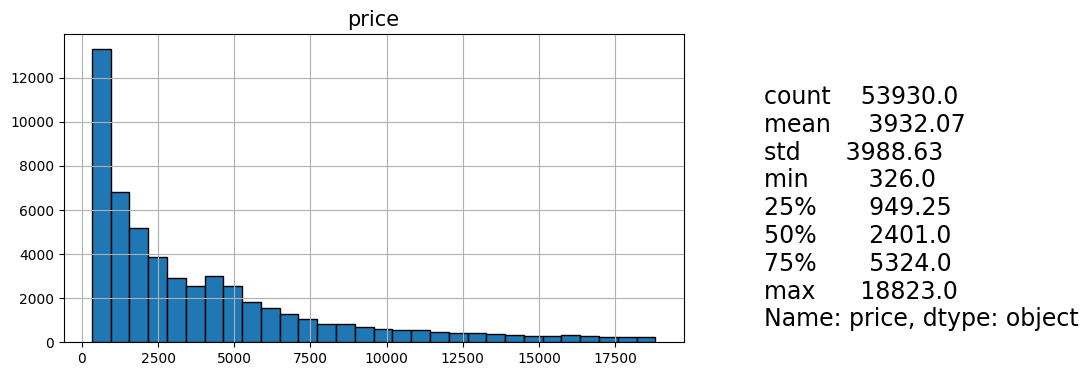

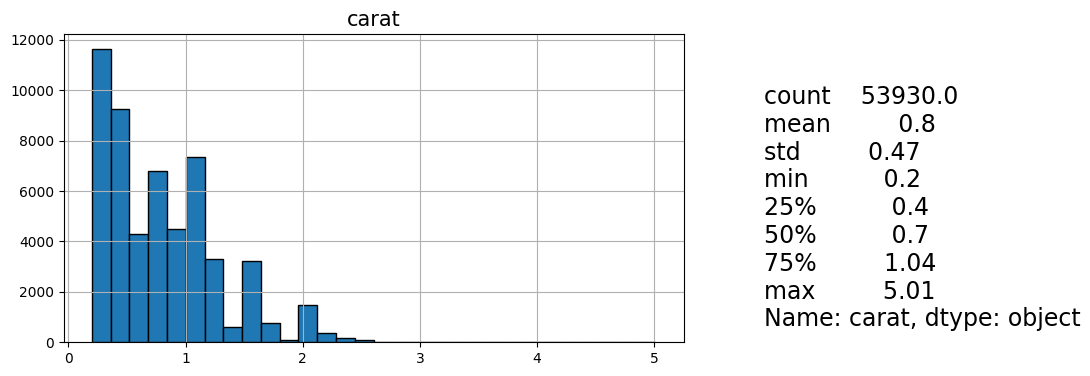

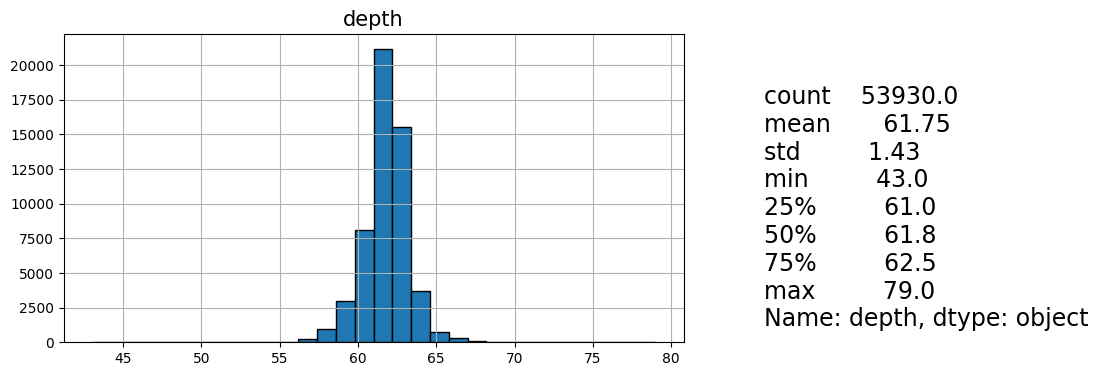

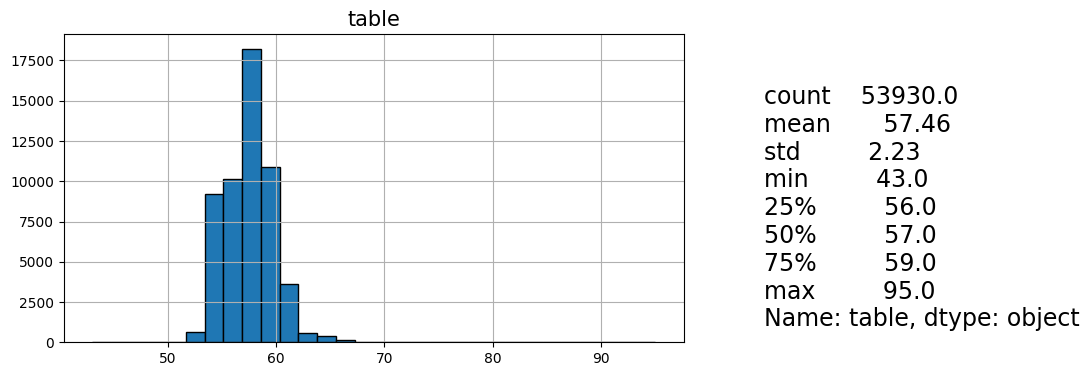

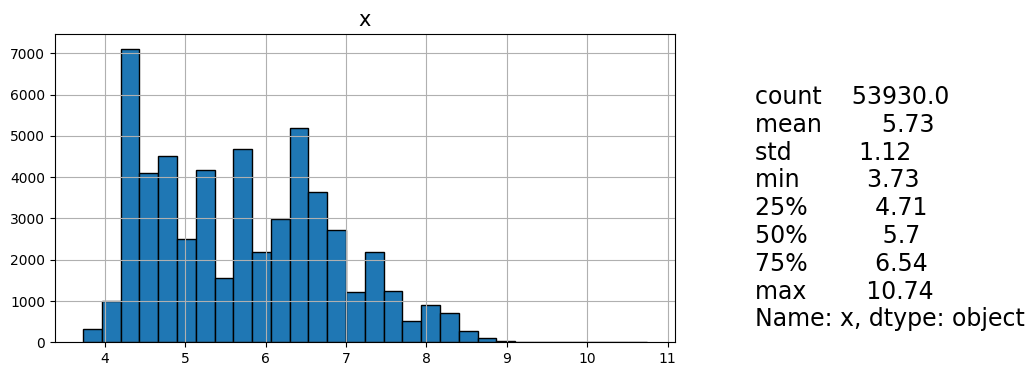

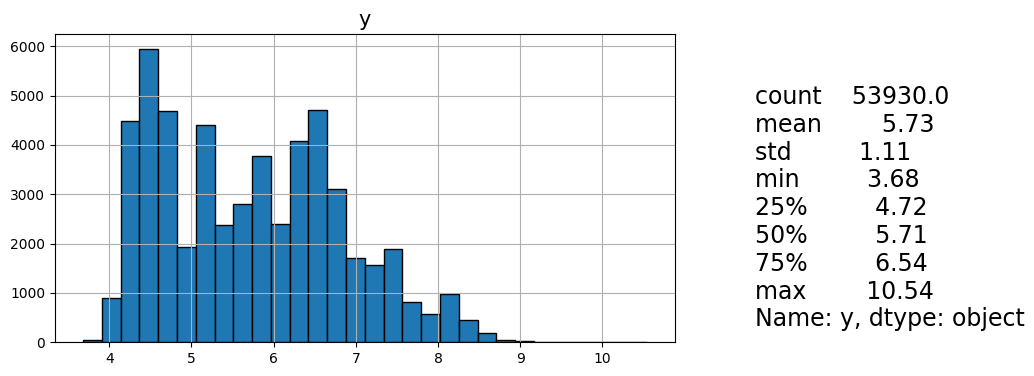

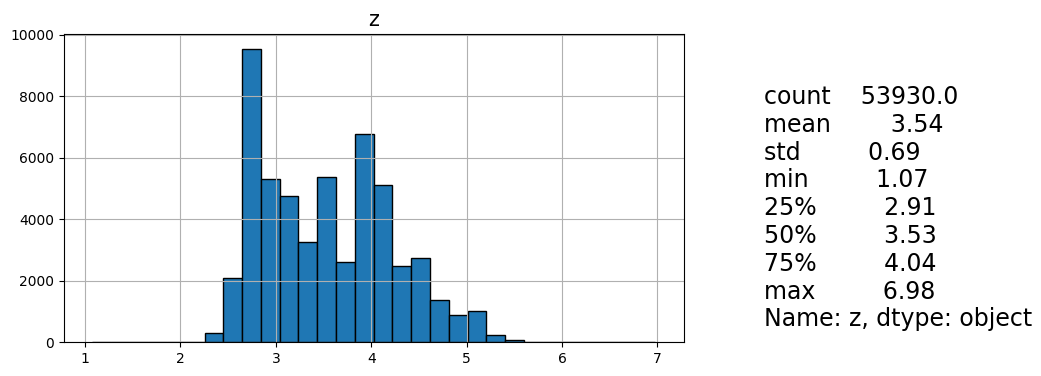

In [20]:
for x in numerical_features:
    desc_num_features(x)

### Eda Univariada para recursos categoricos

           count  percent
cut                      
Ideal      21549     40.0
Premium    13788     25.6
Very Good  12080     22.4
Good        4904      9.1
Fair        1609      3.0


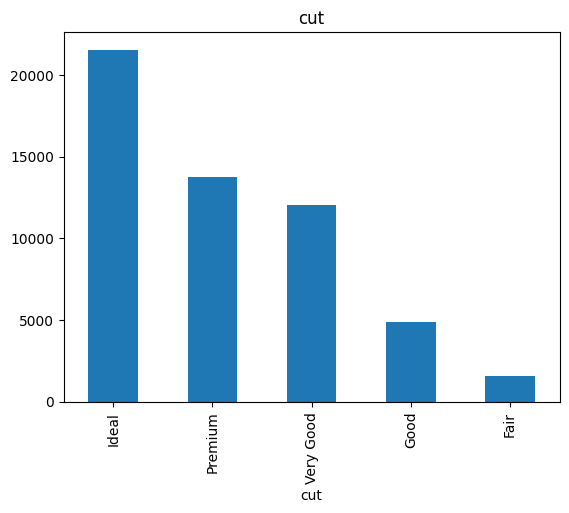

In [21]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

       count  percent
color                
G      11290     20.9
E       9795     18.2
F       9540     17.7
H       8301     15.4
D       6774     12.6
I       5422     10.1
J       2808      5.2


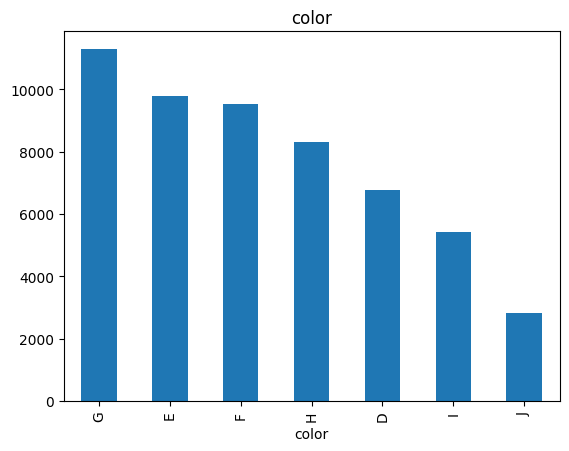

In [22]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

         count  percent
clarity                
SI1      13065     24.2
VS2      12256     22.7
SI2       9190     17.0
VS1       8168     15.1
VVS2      5066      9.4
VVS1      3654      6.8
IF        1790      3.3
I1         741      1.4


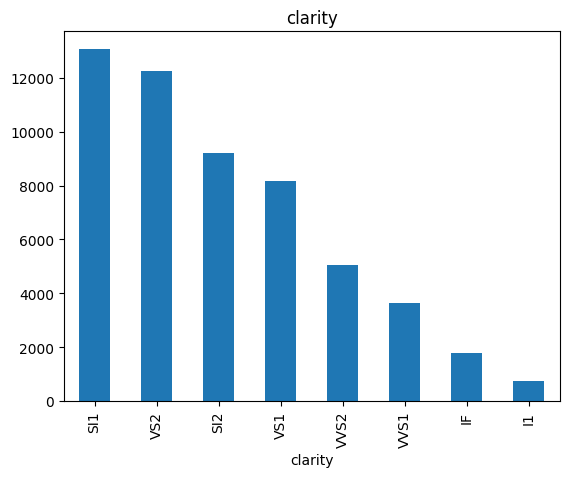

In [23]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [24]:
def desc_cat_feature(feature_name, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, diamonds[feature_name].describe().round(2), size=17)

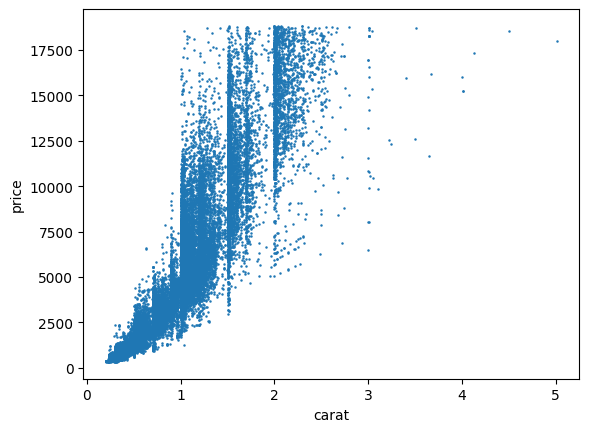

In [25]:
diamonds.plot.scatter(x='carat', y='price', s=0.6);

- **Padrão geral :** Vemos uma relação não linear – talvez o padrão geral seja uma curva quadrática ou exponencial.
- **Força/Ruído :**  Embora o padrão seja claro, há definitivamente muito ruído no relacionamento. Embora possamos imaginar uma curva passando pelo centro dos pontos, há muitos desvios desse padrão geral.
- **Direção :** À medida que o quilate aumenta, vemos que os preços também aumentam, portanto observamos uma relação positiva.

- OBS: O quilate certamente nos ajudará a prever o preço do diamante, mas detectamos uma relação não linear, que será uma consideração importante na modelagem.

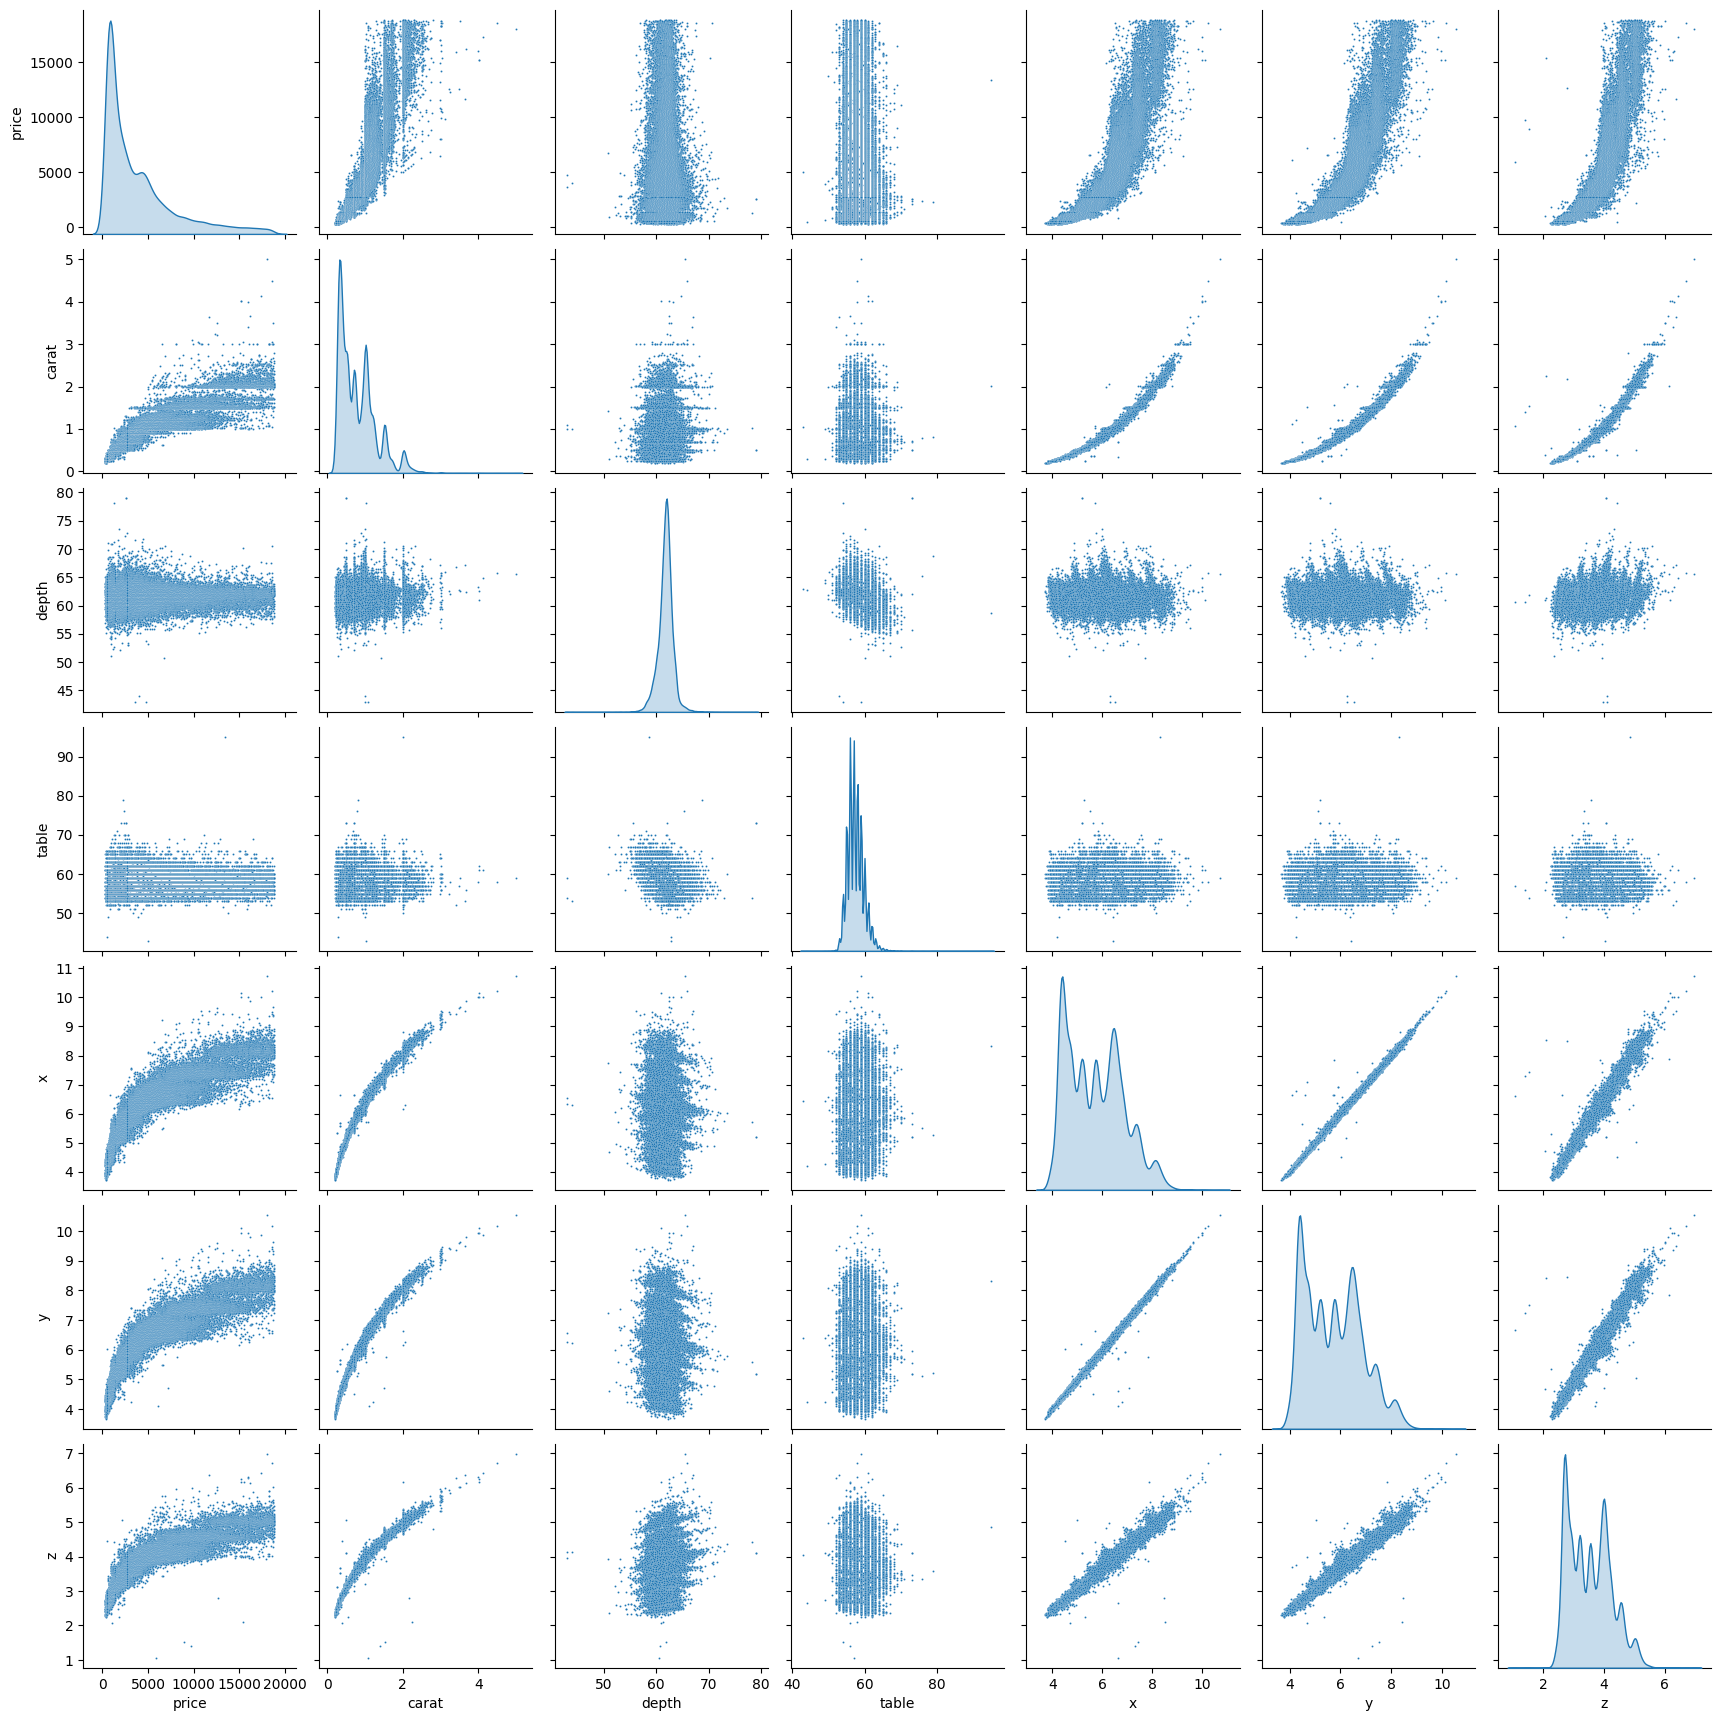

In [26]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2}, diag_kind='kde');

In [27]:
diamonds[numerical_features].corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921603,-0.010595,0.127157,0.887216,0.888810,0.881724
carat,0.921603,1.000000,0.028317,0.181650,0.977761,0.976844,0.976028
depth,-0.010595,0.028317,1.000000,-0.295722,-0.025020,-0.028151,0.096707
table,0.127157,0.181650,-0.295722,1.000000,0.196129,0.189964,0.155849
x,0.887216,0.977761,-0.025020,0.196129,1.000000,0.998652,0.990758
y,0.888810,0.976844,-0.028151,0.189964,0.998652,1.000000,0.990414
z,0.881724,0.976028,0.096707,0.155849,0.990758,0.990414,1.000000


- A correlação com o Carat é muito alta, embora pelo gráfico de dispersão saibamos que existe uma relação não linear, este elevado coeficiente de correlação dá provas adicionais da força da associação entre eles.
- Em depth, o número é muito próximo de zero, confirmando a conclusão do gráfico de dispersão: não há relação entre profundidade e preço.
- Para a Table, existe uma correlação positiva mas muito pequena de 0,127, o que nos diz que conhecer uma tabela não é muito informativo se quisermos saber o quão caro é o diamante.
- Para as variáveis relacionadas à dimensão, x, y, e z, a correlação é muito forte e semelhante, em torno de 0,88. Sabemos, a partir da matriz do gráfico de dispersão, que existe novamente uma relação não linear, mas estes números fornecem provas adicionais da importância dessas características na determinação do preço: diamantes maiores, em qualquer dimensão, são muito provavelmente mais caros.

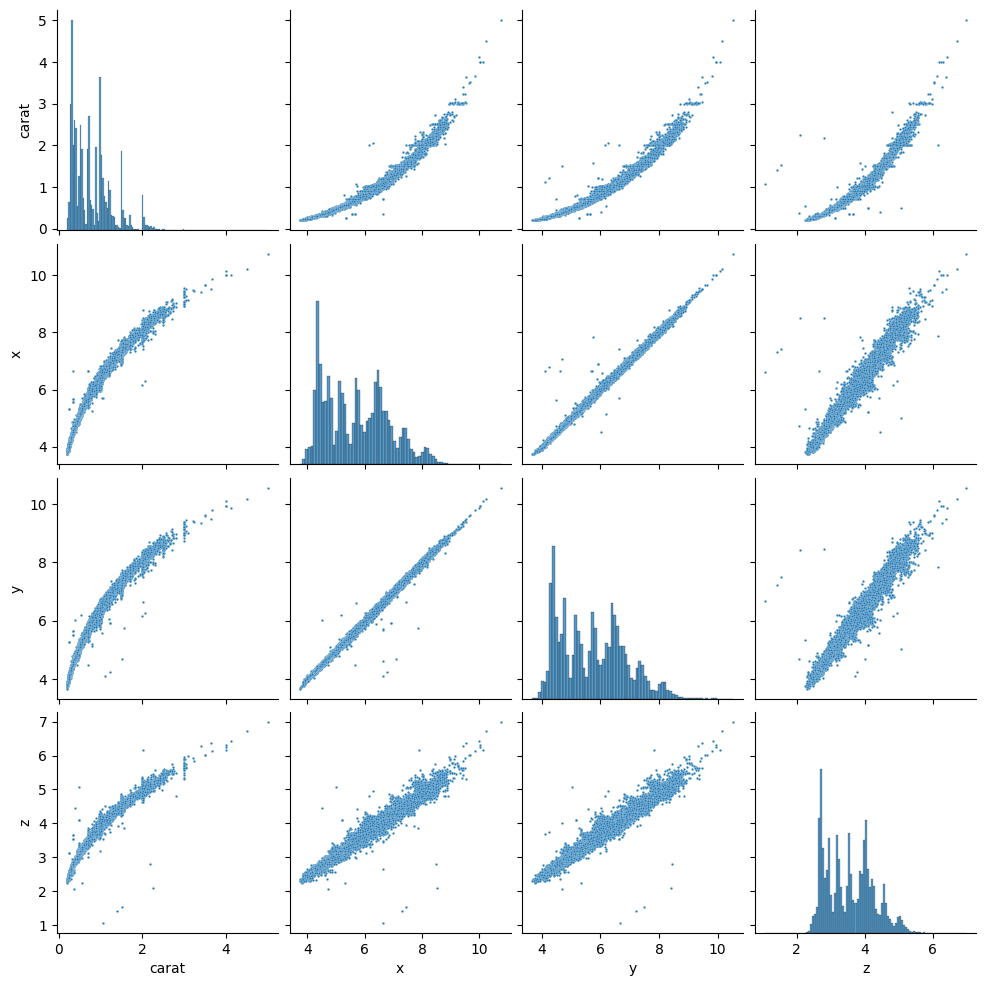

In [28]:
dim_features = diamonds[['carat','x','y','z']]
sns.pairplot(dim_features,plot_kws={"s": 3});

In [29]:
dim_features.corr()

,carat,x,y,z
carat,1.000000,0.977761,0.976844,0.976028
x,0.977761,1.000000,0.998652,0.990758
y,0.976844,0.998652,1.000000,0.990414
z,0.976028,0.990758,0.990414,1.000000


- Percebe-se que todas as correlações são extremamente altas e os gráficos de dispersão entre x, y e z parecem claramente lineares.
 - Basicamente, os três recursos contêm quase as mesmas informações em outras palavras, eles não são independentes. Saber o valor de um nos diz imediatamente muito sobre os valores dos outros recursos.

In [30]:
pd.crosstab(diamonds['cut'], diamonds['color']) 

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,313,303,175,119
Good,662,933,907,871,702,522,307
Ideal,2834,3902,3826,4883,3115,2093,896
Premium,1602,2337,2331,2924,2358,1428,808
Very Good,1513,2399,2164,2299,1823,1204,678


In [31]:
ct = pd.crosstab(diamonds['cut'], diamonds['color'], margins=True, margins_name='Total')
ct

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,163,224,312,313,303,175,119,1609
Good,662,933,907,871,702,522,307,4904
Ideal,2834,3902,3826,4883,3115,2093,896,21549
Premium,1602,2337,2331,2924,2358,1428,808,13788
Very Good,1513,2399,2164,2299,1823,1204,678,12080
Total,6774,9795,9540,11290,8301,5422,2808,53930


In [32]:
100*ct.div(ct['Total'], axis=0).round(3) # multipliquei por 100 para facilitar a leitura dos numeros como porcentagens

color,D,E,F,G,H,I,J,Total
cut,,,,,,,,
Fair,10.1,13.9,19.4,19.5,18.8,10.9,7.4,100.0
Good,13.5,19.0,18.5,17.8,14.3,10.6,6.3,100.0
Ideal,13.2,18.1,17.8,22.7,14.5,9.7,4.2,100.0
Premium,11.6,16.9,16.9,21.2,17.1,10.4,5.9,100.0
Very Good,12.5,19.9,17.9,19.0,15.1,10.0,5.6,100.0
Total,12.6,18.2,17.7,20.9,15.4,10.1,5.2,100.0


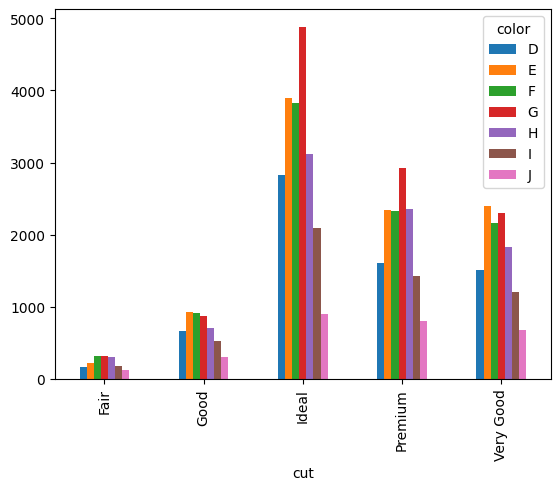

In [33]:
basic_ct = pd.crosstab(diamonds['cut'], diamonds['color'])
basic_ct.plot(kind='bar');

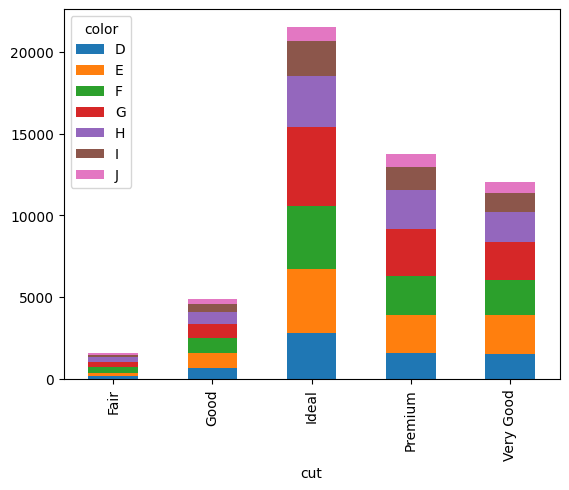

In [34]:
basic_ct.plot(kind='bar', stacked=True);

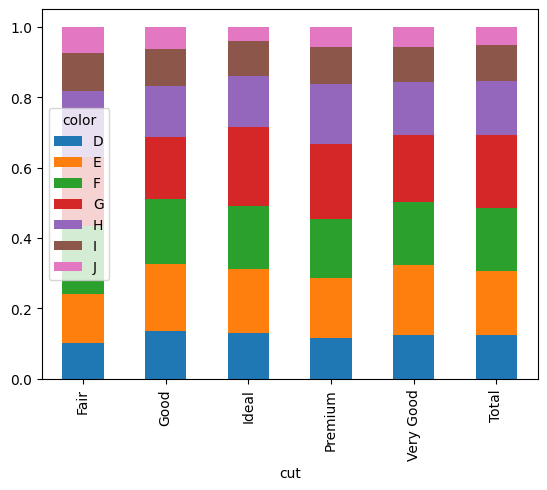

In [35]:
ct.div(ct['Total'], axis=0).iloc[:,:-1].plot(kind='bar', stacked=True);

-  cada barra parece mais ou menos igual, indicando que dentro de cada categoria de corte a proporção de tipos de cores é aproximadamente a mesma. Isto confirma a nossa conclusão anterior sobre a associação entre estas duas características.

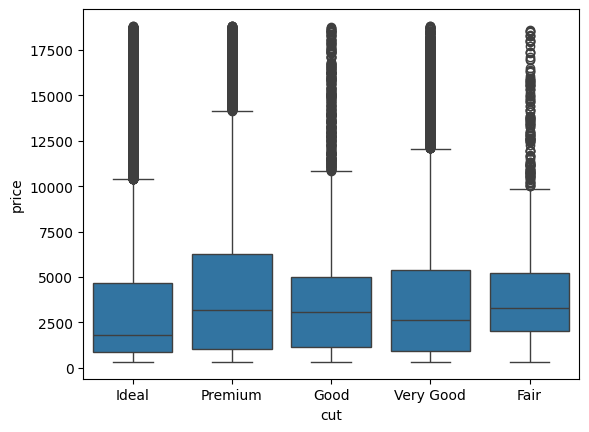

In [36]:
sns.boxplot(x='cut', y='price', data=diamonds);

-  há mais variação no preço dentro da categoria Premium .

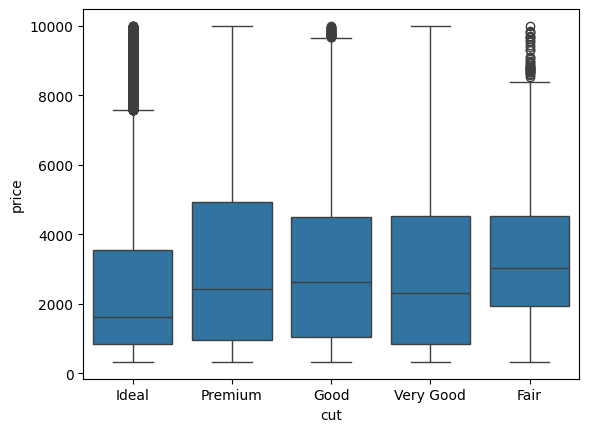

In [37]:
sns.boxplot(x='cut', y='price', data=diamonds.loc[diamonds['price']<10000]);

- As distribuições de preços dos cortes Premium , Bom e Muito Bom são muito parecidas.
- As maiores diferenças estão na distribuição dos preços correspondentes às categorias de corte Fair e Ideal.

- Para diamantes com corte Ideal , mais da metade custa menos de US 2.000, enquanto, para a categoria de corte Fair, apenas cerca de 25% dos diamantes custam menos de US 2.000. Podemos concluir que existe definitivamente uma relação entre os diferentes cortes e a distribuição de preços.

In [38]:
diamonds.groupby('cut')['price'].agg('median').sort_values() #comparando as medianas das diferentes categorias

cut
Ideal        1810.0
Very Good    2648.0
Good         3054.0
Premium      3183.0
Fair         3282.0
Name: price, dtype: float64

clarity
IF      1080.0
VVS1    1092.5
VVS2    1311.0
VS1     2005.0
VS2     2053.0
SI1     2822.0
I1      3344.0
SI2     4072.0
Name: price, dtype: float64


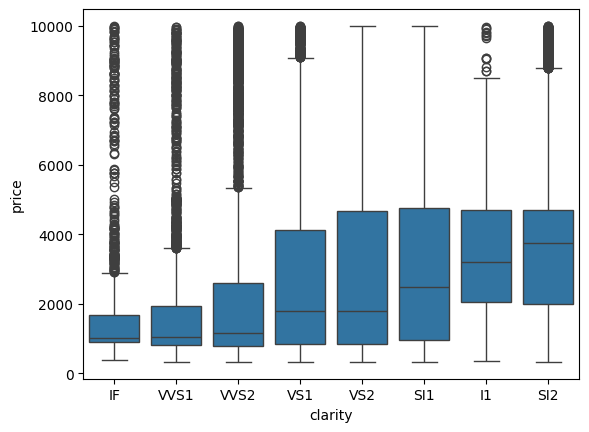

In [39]:
medians_by_clarity = diamonds.groupby('clarity')['price'].agg('median').sort_values()
print(medians_by_clarity)
sns.boxplot(x='clarity', y='price', data=diamonds.loc[diamonds['price']<10000],
            order=medians_by_clarity.index);

- Ha uma relação entre Clareza e Preço

## ML para predição dos preços dos diamantes

#### Primeiramemte o Conjunto de Hipoteses é feito propondo uma relação entre recursos e alvo a ser dada pela seguinte equação:

$$
\Large
\text{price} = w \times \text{carat}
$$

Onde **W** é qualquer numero positivo, portanto nosso conjunto matematico é o conjunto de todas as equações possiveis da forma (H) onde **W** > **0**

O modelo basicamente prevê o preço multiplicando o número pelo valor do quilate. 

- Três elementos do nosso conjunto de hipóteses :

$$
 \text{price} = 3 \times \text{carat}
$$

$$
 \text{price} = 658.1 \times \text{carat}
$$

$$
 \text{price} = 2535 \times \text{carat}
$$

## Usando os dados para treinar o Modelo

In [40]:
w = np.mean(diamonds['price']/diamonds['carat'])
w

np.float64(4008.0243030180177)

In [41]:
def first_ml_model(carat):
    return 4008.024 * carat

In [42]:
carat_values = np.arange(0.5, 5.5, 0.5)
preds = first_ml_model(carat_values)
pd.DataFrame({"Carat": carat_values, "Predicted price":preds})

,Carat,Predicted price
0,0.5,2004.012
1,1.0,4008.024
2,1.5,6012.036
3,2.0,8016.048
4,2.5,10020.060
5,3.0,12024.072
6,3.5,14028.084
7,4.0,16032.096
8,4.5,18036.108
9,5.0,20040.120


## Praticas consideraveis antes da Modelagem 

### Train-Test split

In [43]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

- Utilizei um tamanho de teste de 10% (0,1), o que significa que teremos 5.392 observações para teste, o suficiente para avaliar o desempenho dos modelos

## Redução de dimensionalidade usando PCA

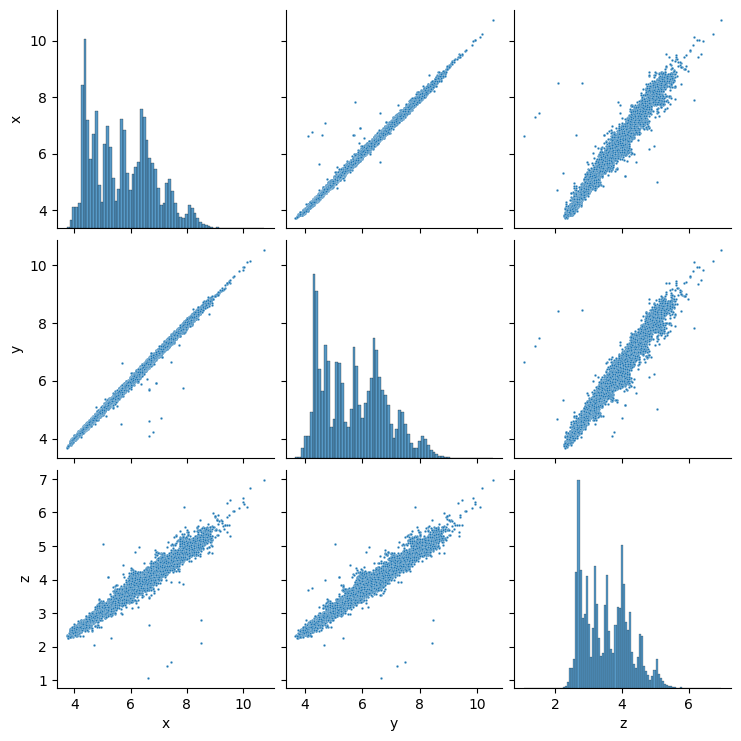

In [45]:
sns.pairplot(X_train[['x','y','z']], plot_kws={"s": 3});

## Usando Transformadores para transformers que são classes do scikit-learn construídas para realizar a preparação de dados.

In [46]:
# Importando a classe a ser usada
from sklearn.decomposition import PCA
# criando uma instancia para a classe
pca = PCA(n_components=3, random_state=123)
# usando o metodo fit da instancia
pca.fit(X_train[['x','y','z']])
# usando o metodo transform para realizar a transformação
princ_comp = pca.transform(X_train[['x','y','z']])

Utilizando o método, podemos verificar, em termos de proporção, quanta variância (ou informação) é capturada por cada um dos três componentes produzidos:

In [47]:
pca.explained_variance_ratio_.round(3)

array([0.997, 0.002, 0.001])

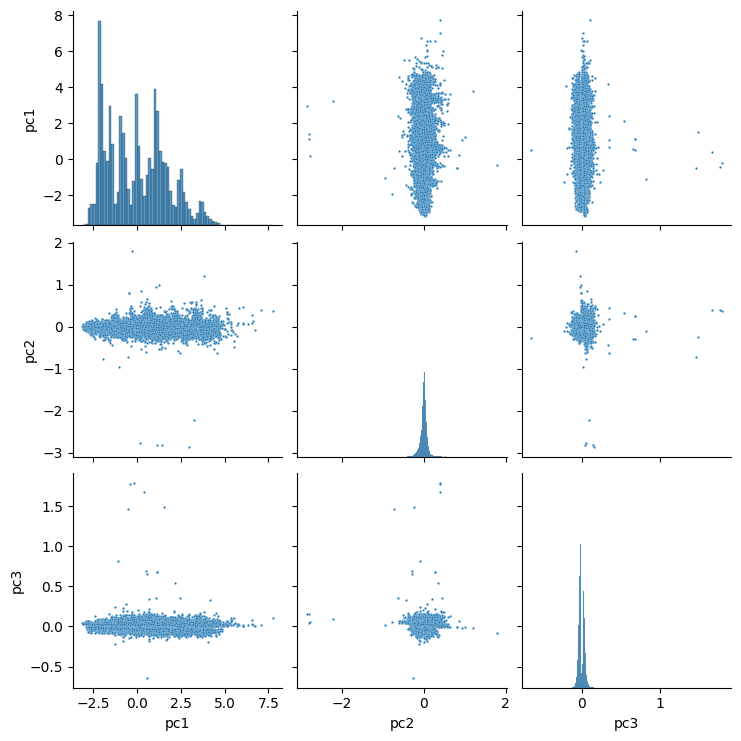

In [48]:
princ_comp = pd.DataFrame(data=princ_comp, columns=['pc1', 'pc2', 'pc3'])
sns.pairplot(princ_comp, plot_kws={"s": 3});

- os três componentes principais não estão realmente correlacionados.

In [49]:
princ_comp.corr().round(4)

,pc1,pc2,pc3
pc1,1.0,0.0,0.0
pc2,0.0,1.0,-0.0
pc3,0.0,-0.0,1.0


In [51]:
## Get only the first principal component
pca = PCA(n_components=1, random_state=123)
## Train the pca transformer
pca.fit(X_train[['x','y','z']])
# Add the new feature to the dataset
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
# Drop x, y, and z
X_train.drop(['x','y','z'], axis=1, inplace=True)

## Padronização- Centralização e dimensionamento

In [52]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']

In [53]:
# Importando a classe a ser usada
from sklearn.preprocessing import StandardScaler
# 2. Creando uma instancia do scalonador de classe
scaler = StandardScaler()
# 3. Usando o  fit method da instancia
scaler.fit(X_train[numerical_features])
# 4. Usando o método transform para realizar a transformação 
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [54]:
X_train[numerical_features].head()

,carat,depth,table,dim_index
30066,-0.840293,1.429309,-0.205642,-0.918724
17608,0.677534,0.383359,-2.001069,0.848719
42508,-0.629484,0.034709,-0.205642,-0.568908
22842,0.719696,-0.662591,0.243215,0.908842
25957,2.553737,-1.987460,2.487499,2.147581


In [55]:
X_train[numerical_features].describe().round(4)

,carat,depth,table,dim_index
count,48537.0000,48537.0000,48537.0000,48537.0000
mean,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.2619,-13.0745,-6.4896,-1.8151
25%,-0.8403,-0.5231,-0.6545,-0.9077
50%,-0.2079,0.0347,-0.2056,-0.0236
75%,0.5089,0.5228,0.6921,0.7115
max,8.8780,12.0283,9.6692,4.4957


# Regressão Linear Multipla

### Treinando o Modelo de Analise Preditiva

In [56]:
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)
y_pred_ml_reg = ml_reg.predict(X_train)

In [57]:
pd.Series(ml_reg.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

carat            5422.04
clarity_IF       5384.93
clarity_VVS1     5040.24
clarity_VVS2     4993.61
clarity_VS1      4616.93
clarity_VS2      4303.06
clarity_SI1      3704.82
clarity_SI2      2740.18
cut_Ideal         856.23
cut_Premium       756.77
cut_Very Good     756.17
cut_Good          609.70
table             -59.04
depth             -80.63
color_E          -217.07
color_F          -276.78
color_G          -489.66
color_H          -991.01
dim_index       -1235.23
color_I         -1480.56
color_J         -2384.35
dtype: float64

- O **Carat** e a **clarity** parecem ser as características que parecem ter maior influência no preço. 

In [59]:
ml_reg.fit(X_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_squared_error
mse_ml_reg = mean_squared_error(y_true=y_train, y_pred=y_pred_ml_reg)
print('{:0.2f}M'.format(mse_ml_reg/1e6))

1.28M


In [61]:
y_pred_null_model = np.full(y_train.shape, y_train.mean())
mse_null_model = mean_squared_error(y_true=y_train, y_pred=y_pred_null_model)
print('{:0.2f}M'.format(mse_null_model/1e6))

15.92M


## Regressão de laço


In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_train)

## MSE calculation
mse_lasso = mean_squared_error(y_true=y_train, y_pred=y_pred_lasso)
print('{:0.2f}M'.format(mse_lasso/1e6))

1.52M


In [63]:
pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False).round(2)

carat            4766.29
clarity_IF       1348.44
clarity_VVS2     1213.08
clarity_VVS1     1194.84
clarity_VS1       860.32
clarity_VS2       616.93
cut_Ideal         169.10
cut_Very Good      89.01
cut_Premium        55.05
clarity_SI1        33.97
color_F            -0.00
cut_Good           -0.00
color_E             0.00
table            -103.99
color_G          -124.79
depth            -145.90
color_H          -609.87
dim_index        -708.54
clarity_SI2      -768.25
color_I         -1001.55
color_J         -1780.44
dtype: float64

## KNN Regression

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [66]:
mse_knn = mean_squared_error(y_true=y_train, y_pred=y_pred_knn)
print('{:0.2f}M'.format(mse_knn/1e6))

0.67M


### Avaliando no conjunto de dados de testes

#### KNN com desempenho perfeito

In [68]:
perfect_knn = KNeighborsRegressor(n_neighbors=1)
perfect_knn.fit(X_train, y_train)
mean_squared_error(y_true=y_train, y_pred=perfect_knn.predict(X_train))

np.float64(192.05816181469805)

### Aplicando as Transformações

In [69]:
## Replacing x, y, z with dim_index using PCA: notice we are not training, just transforming
X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten()

# Remove x, y and z from the dataset
X_test.drop(['x','y','z'], axis=1, inplace=True)

## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [70]:
mse = pd.DataFrame(columns=['train', 'test'], index=['MLR','Lasso','KNN'])
model_dict = {'MLR': ml_reg, 'Lasso': lasso, 'KNN': knn}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e6 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e6
    

In [71]:
mse

,train,test
MLR,1.281012,1.207207
Lasso,1.520619,1.40893
KNN,0.670249,0.780665


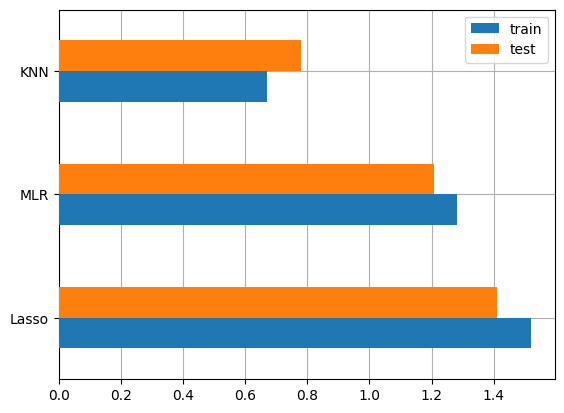

In [72]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [73]:
demo_pred = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['pred_'+name] = model.predict(demo_pred).round(1)

pd.DataFrame(pred_dict)

,y_true,pred_MLR,pred_Lasso,pred_KNN
8549,4434,4638.0,4993.4,4172.9
27123,17313,15503.2,14918.2,14771.3
40907,1179,1603.1,1611.9,1092.5
1375,2966,3063.0,3299.2,2915.8
41673,1240,1859.6,1567.7,978.0
35461,901,1700.1,1329.1,1158.1
30655,736,1086.4,689.6,754.6
10271,4752,6010.9,6042.6,4970.2
28928,684,904.1,762.3,753.5
26351,645,704.7,651.4,722.9
